In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
myData = pd.read_csv('Foreign Tourists.csv')
myData

,Category,CrimeHead,Cases of Crimes Committed against - Foreign Tourists,Cases of Crimes Committed against - Other Foreigners,Cases of Crimes Committed against - Total Foreigners
0,IPC,Murder,6,6,12
1,IPC,Culpable Homicide not Amounting to Murder,2,0,2
2,IPC,Attempt to Commit Murder,0,1,1
3,IPC,Attempt to Commit Culpable Homicide,0,0,0
4,IPC,Grievous Hurt,2,0,2
5,IPC,Assault on Women with Intent to Outrage \nher ...,30,8,38
6,IPC,Kidnapping & Abduction,3,0,3
7,IPC,Human Trafficking,1,1,2
8,IPC,Rape,14,5,19
9,IPC,Theft,104,38,142


In [3]:
X = myData.iloc[:, [2,3]].values
X

array([[  6,   6],
       [  2,   0],
       [  0,   1],
       [  0,   0],
       [  2,   0],
       [ 30,   8],
       [  3,   0],
       [  1,   1],
       [ 14,   5],
       [104,  38],
       [  0,   1],
       [ 16,   3],
       [  2,   0],
       [  7,   1],
       [  3,   0],
       [  1,   1],
       [ 83,  27],
       [274,  92],
       [  2,   0],
       [  8,   6],
       [ 10,   6],
       [284,  98]], dtype=int64)

In [4]:
y = myData.iloc[:, 4].values
y

array([ 12,   2,   1,   0,   2,  38,   3,   2,  19, 142,   1,  19,   2,
         8,   3,   2, 110, 366,   2,  14,  16, 382], dtype=int64)

In [5]:
len(myData)


22

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
X_train

array([[-0.26363854, -0.37739277],
       [-0.38000314, -0.24800096],
       [-0.29272969, -0.29113156],
       [-0.45273101, -0.50678457],
       [ 0.71091497,  0.65774168],
       [-0.46727659, -0.50678457],
       [-0.49636774, -0.46365397],
       [-0.0600005 , -0.16173976],
       [ 3.48911974,  3.46123079],
       [ 1.01637204,  1.1321783 ],
       [-0.48182216, -0.46365397],
       [-0.46727659, -0.50678457],
       [-0.49636774, -0.50678457],
       [-0.40909429, -0.24800096],
       [-0.48182216, -0.46365397],
       [-0.46727659, -0.50678457]])

In [9]:
y_train

array([ 19,  14,  19,   3, 110,   2,   1,  38, 366, 142,   2,   2,   0,
        12,   2,   2], dtype=int64)

In [10]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
y_pred

array([  2,   2,   2,   2,   2, 366], dtype=int64)

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
cm = confusion_matrix(y_test, y_pred)

In [15]:
cm

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [16]:
confusion_matrix(y, classifier.predict(sc.fit_transform(X)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [17]:
from mpl_toolkits.mplot3d import Axes3D

In [18]:
myData.iloc[:,1]

0                                                Murder
1             Culpable Homicide not Amounting to Murder
2                              Attempt to Commit Murder
3                   Attempt to Commit Culpable Homicide
4                                         Grievous Hurt
5     Assault on Women with Intent to Outrage \nher ...
6                                Kidnapping & Abduction
7                                     Human Trafficking
8                                                  Rape
9                                                 Theft
10                                            Extortion
11                                              Robbery
12                                              Dacoity
13                                             Cheating
14                                              Forgery
15                       Insult to the Modesty of Women
16                                          Other IPC *
17                                            To

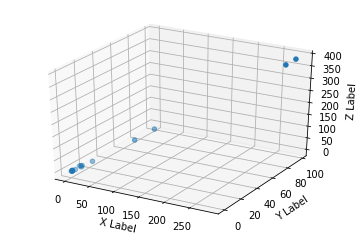

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(myData.iloc[:,2],myData.iloc[:,3],myData.iloc[:,4])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

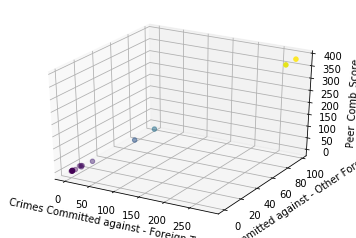

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(myData.iloc[:,2],myData.iloc[:,3], myData.iloc[:,4],c=y, marker='o')
ax.set_xlabel('Crimes Committed against - Foreign Tourists')
ax.set_ylabel('Crimes Committed against - Other Foreigners')
ax.set_zlabel('Total Foreigners')
plt.show()